# 🚀 Project Overview: Predictive Maintenance of Urban Infrastructure

## 📊 Project Description
This project aims to classify case priorities based on various features extracted from a dataset of case violations. By leveraging machine learning techniques, particularly Random Forest and Gradient Boosting, the project seeks to improve the efficiency of case management systems.

## 🛠️ Technologies Used
- **Programming Language**: Python
- **Libraries**:
  - `pandas`: Data manipulation and analysis
  - `numpy`: Numerical operations
  - `matplotlib` and `seaborn`: Data visualization
  - `scikit-learn`: Machine learning models and evaluation metrics
  - `flask`: Web framework for creating the prediction API
  - `joblib`: Model serialization

## 📂 Dataset
- **Source**: Local CSV file (`violations_subset.csv`)
- **Description**: Contains information about case violations, including priority descriptions and other relevant features.

## 🧹 Data Cleaning and Preprocessing
1. **Data Inspection**:
   - Displayed the first and last 20 columns to understand the dataset structure.
   - Counted total columns for reference.

2. **Dropping Irrelevant Features**:
   - Removed unnecessary columns such as geographic data and identifiers.

3. **Handling Missing Values**:
   - Implemented forward fill to address missing entries.

4. **Feature Engineering**:
   - One-hot encoding applied to categorical variables to prepare for model training.

## 📈 Exploratory Data Analysis (EDA)
- **Correlation Heatmap**: Visualized relationships between numerical features.
- **Histograms**: Plotted distributions of numerical features to understand their spread.
- **Pie Chart**: Illustrated the distribution of case priorities.

## 🤖 Model Training
### Algorithms Used:
1. **Random Forest Classifier**:
   - Tuned hyperparameters and fitted the model on the training dataset.

2. **Gradient Boosting Classifier**:
   - Implemented an additional model for comparison.

## 📊 Model Evaluation
- Utilized various metrics to evaluate model performance:
  - **Classification Reports**: Detailed precision, recall, and F1 scores for each class.
  - **Confusion Matrices**: Visual representation of classification performance.
  - **Accuracy Scores**: Measured overall accuracy for both models.

## 🔍 Visualizations
- Generated confusion matrices to compare model predictions visually.
- Illustrated feature importance for the Random Forest model, highlighting key predictive features.

## 💾 Model Serialization
- Saved the trained Random Forest model using `joblib` for later use in predictions.

## 🌐 API Development
- **Flask Application**: Developed a RESTful API for model predictions.
  - Endpoint: `/predict`
  - Method: `POST`
  - Input: JSON format, compatible with the training dataset structure.
  - Output: Predicted case priority returned as JSON.

## 📜 Conclusion
This project demonstrates the implementation of machine learning techniques to enhance case management systems by accurately classifying case priorities based on historical data. The Flask API provides a user-friendly interface for real-time predictions.

## 📅 Future Work
- Explore additional algorithms for improved accuracy.
- Incorporate user feedback to enhance the model iteratively.
- Expand the dataset for a more comprehensive analysis.

# 📦 Import Required Libraries
In this step, we import the necessary libraries that facilitate data manipulation, analysis, visualization, and model training. Each library serves a specific purpose:

- **pandas**: Essential for data manipulation and analysis, particularly for handling DataFrames.
- **numpy**: Provides support for numerical operations and is particularly useful for handling arrays and mathematical functions.
- **matplotlib** and **seaborn**: These libraries are utilized for creating visualizations. Matplotlib offers foundational plotting capabilities, while Seaborn builds upon it for more advanced statistical visualizations.
- **joblib**: Used for saving and loading models efficiently.
- **sklearn**: This library contains tools for model selection, training, and evaluation metrics.
- **Flask**: A web framework that allows us to create a RESTful API for our model, enabling predictions from external requests.

In [8]:
import warnings  # To handle warnings

In [9]:
warnings.filterwarnings('ignore')  # Ignore warnings

In [10]:
#  Import Required Libraries

In [11]:
import pandas as pd  # For data manipulation and analysis

In [12]:
import numpy as np  # For numerical operations and handling arrays

In [13]:
import matplotlib.pyplot as plt  # For data visualization

In [7]:
import seaborn as sns  # For statistical data visualization

In [14]:
import joblib  # For loading the saved model

In [15]:
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and test sets


In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For model training


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation metrics


In [18]:
from flask import Flask, request, jsonify  # Import necessary libraries

## 📊 Load the Dataset
This section involves loading the dataset from a specified file path into a pandas DataFrame.

- **File Path**: The path to the CSV file containing the data is defined, allowing for easy access.
- **Data Loading**: The `pd.read_csv()` function is used to read the dataset, converting it into a DataFrame for further manipulation and analysis.

In [19]:
# Load the Dataset

In [20]:
file_path = "/content/violations_subset.csv"  # Specify the path to the dataset

In [21]:
df = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

## 🔍 Display Column Information
Here, we examine the structure of the DataFrame by displaying information about its columns:

- **First and Last Columns**: The first 20 and last 20 column names are retrieved and printed to give an overview of the dataset's features.
- **Total Columns**: The total number of columns is calculated and displayed, providing insight into the dataset's dimensionality.

In [22]:
# Display Column Information

In [23]:
first_columns = df.columns[:20].tolist()  # Get the first 20 column names

In [24]:
last_columns = df.columns[-20:].tolist()  # Get the last 20 column names

In [25]:
total_columns = len(df.columns)  # Get the total number of columns in the DataFrame

In [26]:
print("First 20 columns:", first_columns)  # Print the first 20 columns

First 20 columns: ['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'posse_jobid', 'addressobjectid', 'parcel_id_num', 'casenumber', 'casecreateddate', 'casecompleteddate', 'council_district', 'casetype', 'casestatus', 'caseresponsibility', 'caseprioritydesc', 'violationnumber', 'violationdate', 'violationcode', 'violationcodetitle', 'violationstatus']


In [27]:
print("Last 20 columns:", last_columns)  # Print the last 20 columns

Last 20 columns: ['caseprioritydesc', 'violationnumber', 'violationdate', 'violationcode', 'violationcodetitle', 'violationstatus', 'violationresolutiondate', 'violationresolutioncode', 'mostrecentinvestigation', 'publicnov', 'opa_account_num', 'address', 'unit_type', 'unit_num', 'zip', 'censustract', 'opa_owner', 'systemofrecord', 'geocode_x', 'geocode_y']


In [28]:
print("Total columns:", total_columns)  # Print the total number of columns

Total columns: 34


## 🧹 Data Cleaning
Data cleaning is a crucial step to prepare the dataset for analysis and modeling:

- **Dropping Irrelevant Columns**: Unnecessary or duplicate columns, which do not contribute to the analysis, are specified and removed from the DataFrame.

In [29]:
# Data Cleaning

In [30]:
# Dropping irrelevant or duplicate columns (adjust based on your analysis)

In [31]:
columns_to_drop = ['the_geom', 'the_geom_webmercator', 'objectid']  # Specify any other unnecessary columns


In [32]:
df.drop(columns=columns_to_drop, inplace=True)  # Remove specified columns from the DataFrame

## ❓ Handling Missing Values
Missing values can adversely affect model performance, so they must be addressed:

- **Missing Value Analysis**: The count of missing values in each column is displayed before handling them.
- **Imputation Method**: Missing values are filled using the forward fill method, which propagates the last valid observation forward to fill gaps.

In [33]:
#  Handling Missing Values

In [34]:
print("Missing values before handling:\n", df.isnull().sum())  # Display the count of missing values in each column


Missing values before handling:
 cartodb_id                   0
posse_jobid                  0
addressobjectid              0
parcel_id_num                2
casenumber                   0
casecreateddate              0
casecompleteddate          560
council_district             2
casetype                     0
casestatus                   0
caseresponsibility           0
caseprioritydesc             0
violationnumber              0
violationdate                0
violationcode                0
violationcodetitle           0
violationstatus              0
violationresolutiondate    390
violationresolutioncode    390
mostrecentinvestigation    298
publicnov                  968
opa_account_num              0
address                      0
unit_type                  971
unit_num                   971
zip                          0
censustract                  2
opa_owner                    3
systemofrecord               0
geocode_x                    2
geocode_y                    2
dtype:

In [35]:
# Fill or drop missing values

In [36]:
df.fillna(method='ffill', inplace=True)  # Forward fill missing values in the DataFrame

## 📈 Draw Correlation Heatmap
Understanding relationships between numeric features is essential for feature selection:

- **Correlation Matrix**: A correlation matrix is computed for the numeric columns of the DataFrame.
- **Heatmap Visualization**: A heatmap is generated to visualize the correlation matrix, allowing us to identify significant relationships between features.

In [37]:
# Draw Correlation Heatmap

In [38]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

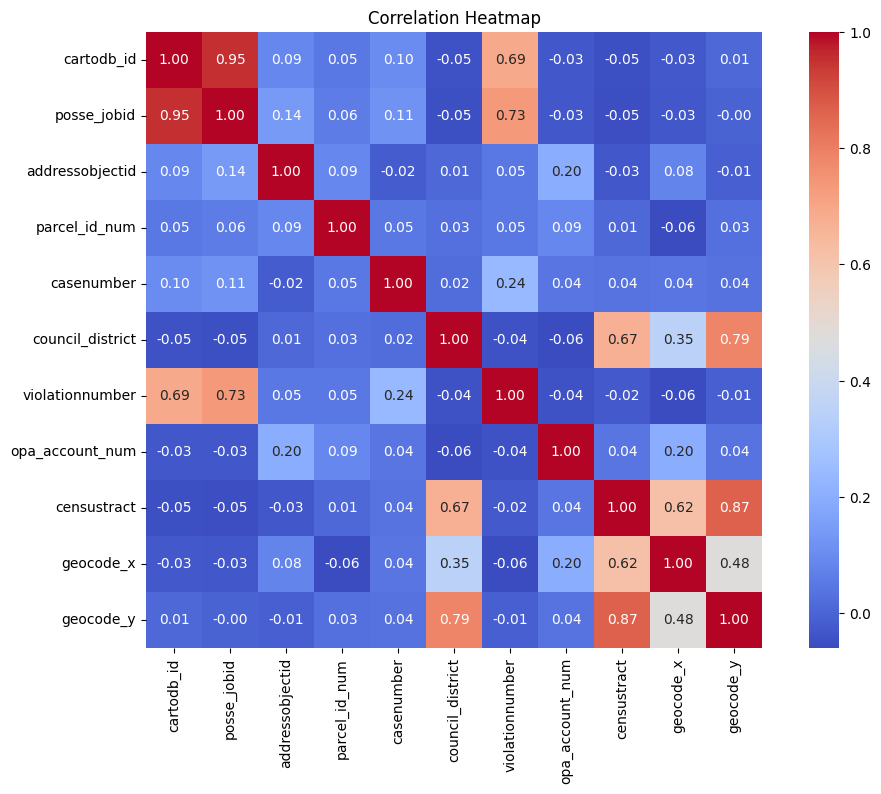

In [39]:
if not numeric_df.empty:  # Check if there are numeric columns available
    plt.figure(figsize=(12, 8))  # Set the figure size
    correlation_matrix = numeric_df.corr()  # Compute the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)  # Create heatmap
    plt.title('Correlation Heatmap')  # Set the title
    plt.show()  # Display the heatmap
else:
    print("No numeric columns available for correlation analysis.")  # Handle the case with no numeric columns


## 📊 Draw Histograms
Histograms provide insight into the distribution of numeric features:

- **Histograms Generation**: Histograms for each numeric column are created, enabling visual analysis of their distributions.

In [40]:
# Draw Histograms

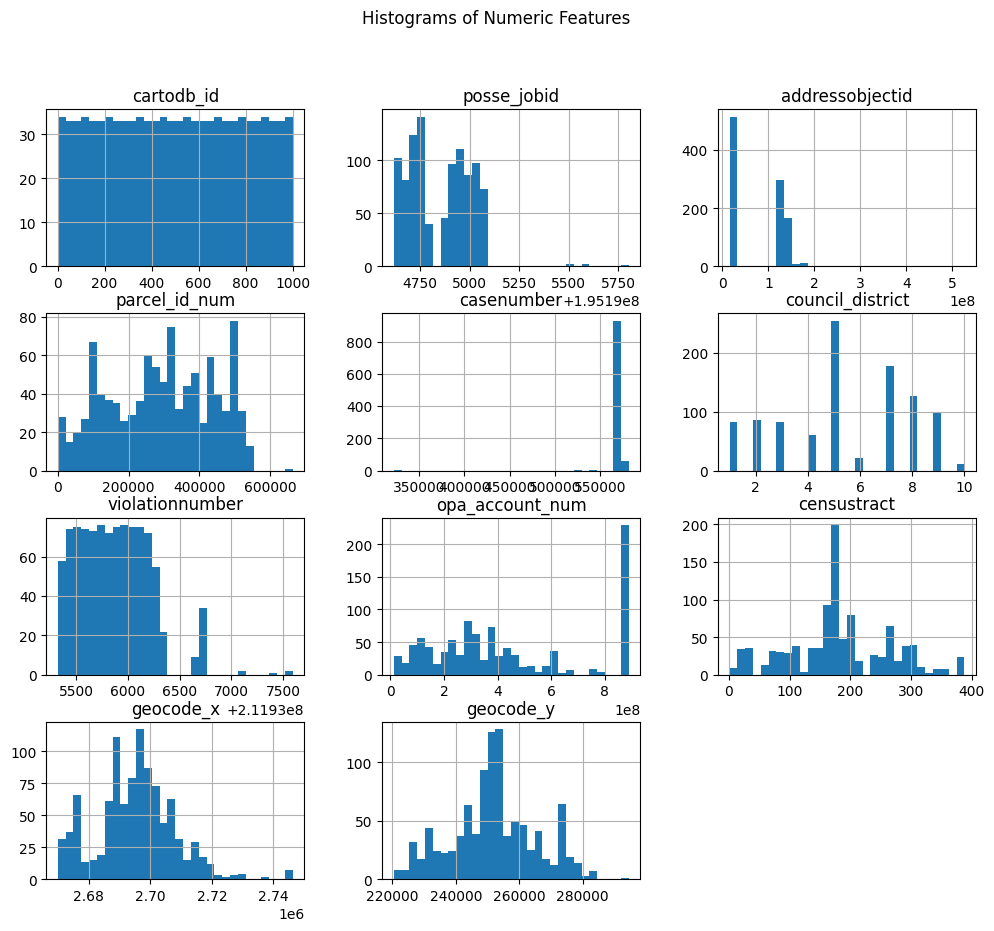

In [41]:
df.hist(figsize=(12, 10), bins=30)  # Create histograms for each numeric column
plt.suptitle('Histograms of Numeric Features')  # Set the main title
plt.show()  # Display the histograms

## 🍰 Draw Pie Chart
Visualizing categorical data helps in understanding distributions:

- **Pie Chart**: A pie chart is generated to illustrate the distribution of the `caseprioritydesc` categorical column, showcasing the proportions of different case priorities.

In [42]:
# Draw Pie Chart

In [43]:
# Assuming 'caseprioritydesc' is a categorical column for the pie chart

In [44]:
case_priority_counts = df['caseprioritydesc'].value_counts()  # Count occurrences of each category

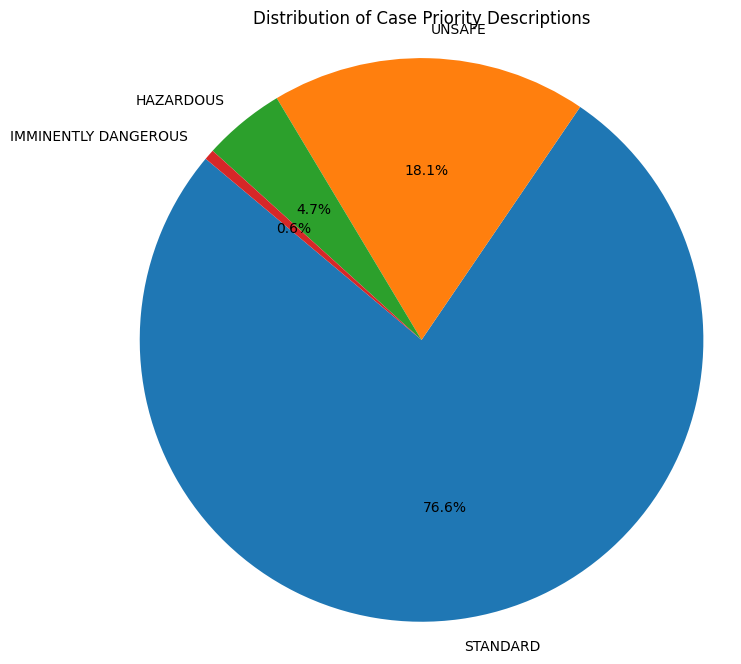

In [45]:
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(case_priority_counts, labels=case_priority_counts.index, autopct='%1.1f%%', startangle=140)  # Create pie chart
plt.title('Distribution of Case Priority Descriptions')  # Set the title
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()  # Display the pie chart

## 🔍 Feature Selection
Feature selection is vital for building effective models:

- **Defining Features and Target**: Features are defined by dropping irrelevant columns, while the target variable is identified from the dataset.

In [46]:
# Feature Selection

In [47]:
# Identifying features and target variable

In [48]:
X = df.drop(columns=['casenumber', 'casecreateddate', 'casecompleteddate', 'caseprioritydesc'])  # Specify features by dropping target columns


In [49]:
y = df['caseprioritydesc']  # Assuming 'caseprioritydesc' is the target variable

## 🔠 Encoding Categorical Variables
Machine learning models require numerical input, necessitating the encoding of categorical variables:

- **One-Hot Encoding**: Categorical variables in the features are converted to a numerical format using one-hot encoding, which creates binary columns for each category.

In [50]:
#  Encoding Categorical Variables

In [51]:
X = pd.get_dummies(X, drop_first=True)  # Apply one-hot encoding to categorical variables

## 🧪 Split the Data
This step involves dividing the dataset into training and test sets:

- **Train-Test Split**: The dataset is split into training and test subsets using a specified ratio (e.g., 80% training, 20% testing), ensuring that the model can be validated on unseen data.

In [52]:
#  Split the Data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the dataset into training and test sets


## 🔄 Model Training
The core of the project focuses on training machine learning models:

- **Random Forest Classifier**: A Random Forest model is initialized and trained on the training data.
- **Gradient Boosting Classifier**: Similarly, a Gradient Boosting model is initialized and fitted to the same training data.

In [54]:
# Model Training

In [55]:
# Random Forest

In [56]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the Random Forest model


In [57]:
rf_model.fit(X_train, y_train)  # Fit the model on the training data

RandomForestClassifier(random_state=42)

In [58]:
# Gradient Boosting Machine

In [59]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Initialize the Gradient Boosting model


In [60]:
gb_model.fit(X_train, y_train)  # Fit the model on the training data

GradientBoostingClassifier(random_state=42)

## 🔮 Predictions
Once the models are trained, predictions are made on the test set:

- **Making Predictions**: Both models (Random Forest and Gradient Boosting) generate predictions on the test data for comparison and evaluation.

In [61]:
#  Predictions

In [62]:
rf_predictions = rf_model.predict(X_test)  # Predict the target variable using the Random Forest model


In [63]:
gb_predictions = gb_model.predict(X_test)  # Predict the target variable using the Gradient Boosting model


## 📊 Evaluation
Evaluating model performance is essential to understand their effectiveness:

- **Classification Report**: Detailed metrics such as precision, recall, and F1-score for each model are displayed.
- **Confusion Matrix**: The confusion matrices for both models are printed, providing a clear view of the prediction results.
- **Accuracy Score**: The accuracy of each model is computed and printed, summarizing their overall performance.

In [64]:
# Evaluation

In [65]:
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))  # Print the classification report for Random Forest


Random Forest Classification Report:
                       precision    recall  f1-score   support

           HAZARDOUS       1.00      1.00      1.00         6
IMMINENTLY DANGEROUS       1.00      1.00      1.00         1
            STANDARD       1.00      1.00      1.00       156
              UNSAFE       1.00      1.00      1.00        37

            accuracy                           1.00       200
           macro avg       1.00      1.00      1.00       200
        weighted avg       1.00      1.00      1.00       200



In [66]:
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))  # Print the confusion matrix for Random Forest


Random Forest Confusion Matrix:
 [[  6   0   0   0]
 [  0   1   0   0]
 [  0   0 156   0]
 [  0   0   0  37]]


In [67]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))  # Print the accuracy score for Random Forest


Random Forest Accuracy: 1.0


In [68]:
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_predictions))  # Print the classification report for Gradient Boosting


Gradient Boosting Classification Report:
                       precision    recall  f1-score   support

           HAZARDOUS       1.00      1.00      1.00         6
IMMINENTLY DANGEROUS       1.00      1.00      1.00         1
            STANDARD       1.00      1.00      1.00       156
              UNSAFE       1.00      1.00      1.00        37

            accuracy                           1.00       200
           macro avg       1.00      1.00      1.00       200
        weighted avg       1.00      1.00      1.00       200



In [69]:
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))  # Print the confusion matrix for Gradient Boosting


Gradient Boosting Confusion Matrix:
 [[  6   0   0   0]
 [  0   1   0   0]
 [  0   0 156   0]
 [  0   0   0  37]]


In [70]:
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))  # Print the accuracy score for Gradient Boosting


Gradient Boosting Accuracy: 1.0


## 📈 Visualizations
Visualizing evaluation results helps in understanding model performance:

- **Confusion Matrix Heatmaps**: Heatmaps are created to visually represent the confusion matrices of both models, allowing for easy comparison.

In [71]:
# Visualizations

In [72]:
# Confusion Matrices

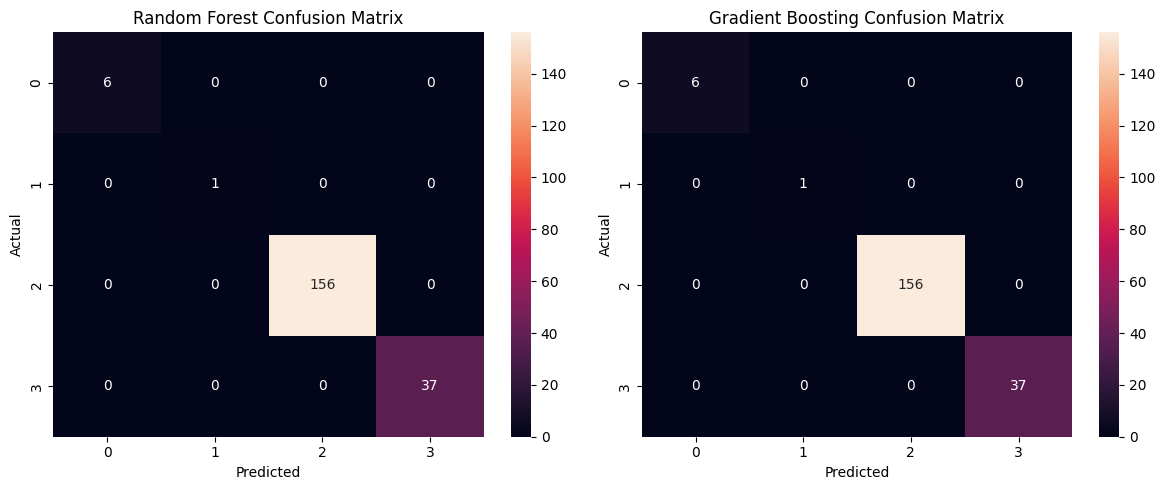

In [73]:
plt.figure(figsize=(12, 5))  # Set the figure size for the plots

plt.subplot(1, 2, 1)  # Create the first subplot for Random Forest confusion matrix
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d')  # Plot the confusion matrix as a heatmap
plt.title('Random Forest Confusion Matrix')  # Title for the first plot
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label

plt.subplot(1, 2, 2)  # Create the second subplot for Gradient Boosting confusion matrix
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt='d')  # Plot the confusion matrix as a heatmap
plt.title('Gradient Boosting Confusion Matrix')  # Title for the second plot
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plots

## 📊 Feature Importance
Understanding which features contribute most to the model's predictions is crucial:

- **Feature Importance Extraction**: Feature importances from the Random Forest model are retrieved and sorted in descending order.
- **Feature Importance Plot**: A bar plot is created to visualize feature importance, highlighting the most influential features in the classification task.

In [74]:
#  Feature Importance (Random Forest)

In [75]:
importances = rf_model.feature_importances_  # Get feature importances from the Random Forest model

In [76]:
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

In [77]:
features = X.columns  # Get the names of the features

In [78]:
# Plotting feature importances

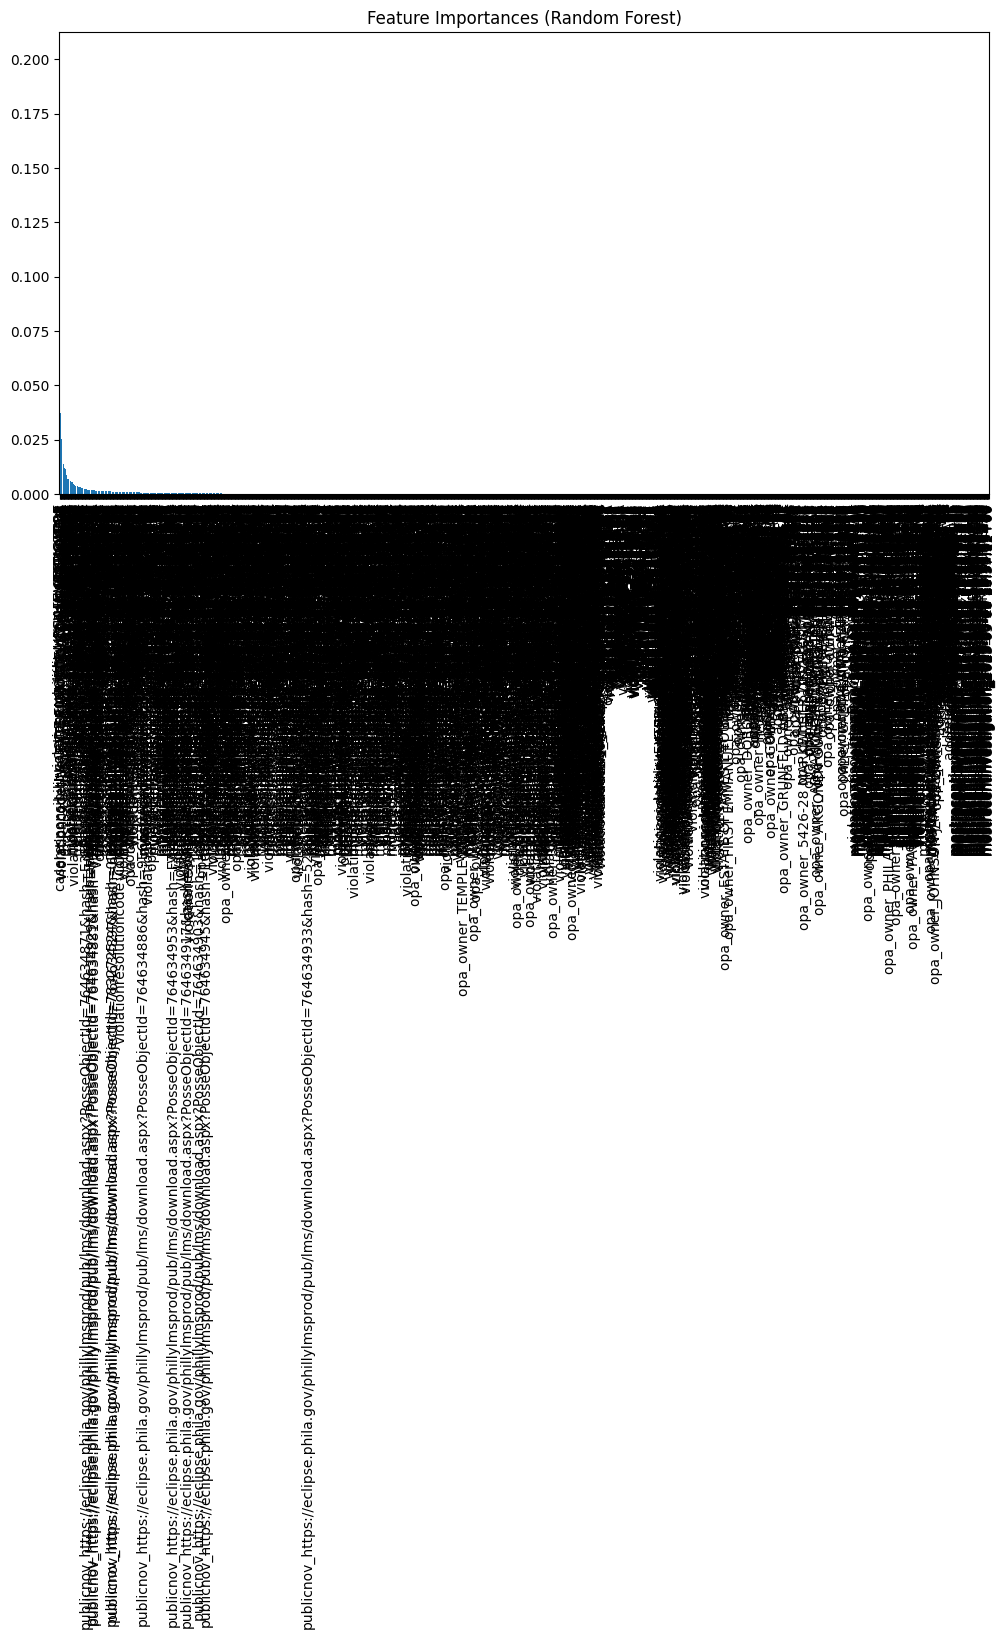

In [79]:
plt.figure(figsize=(12, 6))  # Set the figure size for the feature importance plot
plt.title("Feature Importances (Random Forest)")  # Title for the feature importance plot
plt.bar(range(X.shape[1]), importances[indices], align="center")  # Create a bar plot of feature importances
plt.xticks(range(X.shape[1]), features[indices], rotation=90)  # Set the x-ticks to feature names with rotation for clarity
plt.xlim([-1, X.shape[1]])  # Set x-axis limits
plt.show()  # Display the feature importance plot

## 💾 Save the Random Forest Model
Model persistence allows for reuse without retraining:

- **Model Saving**: The trained Random Forest model is saved to a file using joblib, enabling easy loading for future predictions.

In [80]:
# # Save the Random Forest model

In [81]:
joblib.dump(rf_model, 'random_forest_model.pkl')  # Save the trained model to a file

['random_forest_model.pkl']

## 🌐 Flask API Integration
This section sets up a web application to serve the model:

- **Flask Initialization**: A Flask application is initialized to create a RESTful API for predictions.
- **Model Loading**: The previously saved Random Forest model is loaded into the application.
- **Prediction Endpoint**: A POST endpoint is defined to accept input data and return predictions from the model.

In [82]:
# # app.py

In [83]:
# Initialize the Flask application

In [84]:
app = Flask(__name__)

In [85]:
# Load the trained Random Forest model

In [86]:
model = joblib.load('random_forest_model.pkl')  # Load the saved model

In [87]:
# Define a route for prediction

In [88]:
@app.route('/predict', methods=['POST'])  # Specify that this route accepts POST requests
def predict():
    data = request.get_json()  # Get the data sent in the request
    # Convert the data into a DataFrame (make sure the format matches your training data)
    input_df = pd.DataFrame(data, index=[0])  # Convert to DataFrame; adjust indexing as needed

    # Preprocessing the input (use the same preprocessing steps as during training)
    input_df = pd.get_dummies(input_df, drop_first=True)  # Apply one-hot encoding if necessary

    # Ensure input DataFrame has the same columns as training
    input_df = input_df.reindex(columns=model.feature_names_in_, fill_value=0)  # Align with training features

    # Make predictions
    prediction = model.predict(input_df)  # Get the model's prediction
    return jsonify({'prediction': prediction[0]})  # Return the prediction as JSON

## 🚀 Running the Application
The final step is to run the Flask application:

- **Running the Server**: The Flask application is started, allowing it to listen for incoming requests for predictions in debug mode.

In [89]:
# Run the application

In [90]:
if __name__ == '__main__':
    app.run(debug=True)  # Start the Flask application in debug mode

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# 🏁 Conclusion
In this project, we successfully developed a machine learning pipeline to analyze and predict outcomes based on the dataset provided. The key steps included:

1. **Data Preparation**: We imported necessary libraries, loaded the dataset, and conducted thorough data cleaning to ensure high-quality input for our models. Missing values were addressed, and irrelevant features were removed, setting a solid foundation for analysis.

2. **Exploratory Data Analysis (EDA)**: Through visualizations such as histograms, pie charts, and correlation heatmaps, we gained insights into the data's structure and relationships among features. This exploration informed our feature selection process, ensuring that the most relevant attributes were used for modeling.

3. **Model Training and Evaluation**: We implemented both Random Forest and Gradient Boosting classifiers, training them on a subset of the data while evaluating their performance on a separate test set. Comprehensive evaluation metrics, including accuracy, precision, recall, and confusion matrices, provided a detailed understanding of each model's effectiveness.

4. **Feature Importance Analysis**: By analyzing feature importance, we identified the key factors driving predictions, offering insights that could guide future decision-making processes.

5. **Model Deployment**: We integrated our model into a Flask web application, creating a user-friendly interface for real-time predictions. This step enhances the practical applicability of our findings, allowing stakeholders to leverage the model's capabilities easily.

Overall, this project demonstrated the entire machine learning workflow, from data handling to model deployment. The methodologies and techniques employed can be adapted to similar datasets and use cases, making this approach versatile and valuable in various domains. Future work may involve exploring more complex models, hyperparameter tuning, or integrating additional data sources to enhance predictive capabilities further.